<p><br></p>
<p><br></p>
<p><br></p>
<p><strong><span style="font-size: 24px;"><span style="font-family: 'Times New Roman', Times, serif;">Applied Data Science Capstone - Battle of the Neighborhoods</span></span></strong></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><strong><span style="font-size: 19px;">Analyzing the neighborhoods of Boston, Massachusetts</span></strong></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><strong><span style="font-size: 19px;">Introduction: Business Problem</span><span style="font-size: 17px;">&nbsp;</span></strong></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="color: rgb(0, 0, 0); font-size: 17px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-style: initial; text-decoration-color: initial; float: none; display: inline !important;">Safety is key when looking into moving to a new place and the level of crime provides insights with respect to that. The report is targeted towards individuals who are planning to move into Boston or individuals who are in Boston and are planning to move within the city.</span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">The aim of this project is to find the safest neighborhood in the city of Boston, Massachusetts. It&#39;s determined by looking deeper into the number of crimes per neighborhood and finally, to explore the top 10 common venues in the safest neighborhood by street and cluster them using K-means clustering.</span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 19px;"><strong>Data</strong></span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">The data is extracted from <a href="https://data.boston.gov/" rel="noopener noreferrer" target="_blank">Analyze Boston</a>, which is an open data hub of the city of Boston. The data set that will be used is <a href="https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system" rel="noopener noreferrer" target="_blank">Crime Incidents Report</a>. These are reports provided by the Boston Police Department to document the initial details surrounding an incident to which BPD officers respond.&nbsp;</span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">The dataset contains records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and when it occurred. The record begins in June 2015. Since the analysis is focused on safety, the latest year i.e 2019 is considered.&nbsp;</span></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Metadata:</span></span></p>
<ul>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Incident_num: Internal BPD report number</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Offense_code: Numerical code of offense description&nbsp;</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Offense_Code_Group_Description: Internal categorization of [offense_description]</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Offense_Description: Primary descriptor of incident</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">District: What district the crime was reported</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Reporting_area: RA number associated&nbsp;</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Shooting: indicated a shooting took place</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Occurred_on: Earliest date and time the incident could have taken place</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">UCR_Part: Universal &nbsp;Crime Reporting Part number (1,2,3)</span></span></li>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 17px;">Street: Street name the incident took place</span></span></li>
</ul>
<p><span style="font-family: 'Times New Roman', Times, serif;"><br></span></p>
<p><br></p>

<p><span style='font-size: 17px; font-family: "Times New Roman", Times, serif;'><strong>Importing Packages &amp; Reading the data</strong></span></p>

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [20]:
# Assigning the data to df
df = pd.read_csv("boston_crime.csv")

In [21]:
# View the top 5 rows of the dataset
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [22]:
# Taking only the most recent year (2019) and dropping the rest
df.drop(df.index[df['YEAR'] != 2019], inplace = True)

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [23]:
# Checking the number of rows and columns
df.shape

(98082, 17)

<p><span style='font-size: 17px; font-family: "Times New Roman", Times, serif;'><strong>Data Cleaning</strong></span></p>

In [24]:
# Making a new column called dist_names 
df['dist_names'] = ''

# assign 'qualitative_rating' based on 'grade' with .loc
df.loc[df.DISTRICT == 'B2', 'dist_names'] = 'Roxbury'
df.loc[df.DISTRICT == 'C11', 'dist_names'] = 'Dorchester'
df.loc[df.DISTRICT == 'D4', 'dist_names'] = 'South End'
df.loc[df.DISTRICT == 'B3', 'dist_names'] = 'Mattapan'
df.loc[df.DISTRICT == 'A1', 'dist_names'] = 'Downtown'
df.loc[df.DISTRICT == 'C6', 'dist_names'] = 'South Boston'
df.loc[df.DISTRICT == 'D14', 'dist_names'] = 'Brighton'
df.loc[df.DISTRICT == 'E18', 'dist_names'] = 'Hyde Park'
df.loc[df.DISTRICT == 'E13', 'dist_names'] = 'Jamaica Plain'
df.loc[df.DISTRICT == 'E5', 'dist_names'] = 'West Roxbury'
df.loc[df.DISTRICT == 'A7', 'dist_names'] = 'East Boston'
df.loc[df.DISTRICT == 'A15', 'dist_names'] = 'Charlestown'

In [25]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,dist_names
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)",
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)",Jamaica Plain
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)",Dorchester
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)",Brighton
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)",Jamaica Plain


In [26]:
# Dropping columns that are not needed for the analysis 
df.drop(axis=1, columns=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION','DISTRICT',
                        'REPORTING_AREA', 'OCCURRED_ON_DATE','YEAR', 'MONTH', 'DAY_OF_WEEK','HOUR','UCR_PART',
                        'Location', 'SHOOTING'], inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

In [27]:
df.head(5)

,OFFENSE_CODE_GROUP,STREET,Lat,Long,dist_names
0,NaN,RIVERVIEW DR,NaN,NaN,
1,NaN,DAY ST,42.325122,-71.107779,Jamaica Plain
2,NaN,GIBSON ST,42.297555,-71.059709,Dorchester
3,NaN,BROOKS ST,42.355120,-71.162678,Brighton
4,NaN,WASHINGTON ST,42.309718,-71.104294,Jamaica Plain


In [28]:
df.shape

(98082, 5)

In [29]:
# Renaming the columns
df.rename(columns={"dist_names": "District_Names", "OFFENSE_CODE_GROUP" : "Offense_Category",
                   "STREET" : "Street"}, inplace=True)

# Checking the newly named columns
df.columns

Index(['Offense_Category', 'Street', 'Lat', 'Long', 'District_Names'], dtype='object')

In [31]:
# Rearranging the columns
df = df[['District_Names','Street','Offense_Category','Lat','Long']]

# Checking if it is rearranged
df.head(5)

,District_Names,Street,Offense_Category,Lat,Long
0,,RIVERVIEW DR,NaN,NaN,NaN
1,Jamaica Plain,DAY ST,NaN,42.325122,-71.107779
2,Dorchester,GIBSON ST,NaN,42.297555,-71.059709
3,Brighton,BROOKS ST,NaN,42.355120,-71.162678
4,Jamaica Plain,WASHINGTON ST,NaN,42.309718,-71.104294


In [32]:
# Replacing the blanks in the District_Names column to NaN
df.replace(r'^\s*$', np.NaN, regex=True, inplace=True)
df.head(5)

,District_Names,Street,Offense_Category,Lat,Long
0,NaN,RIVERVIEW DR,NaN,NaN,NaN
1,Jamaica Plain,DAY ST,NaN,42.325122,-71.107779
2,Dorchester,GIBSON ST,NaN,42.297555,-71.059709
3,Brighton,BROOKS ST,NaN,42.355120,-71.162678
4,Jamaica Plain,WASHINGTON ST,NaN,42.309718,-71.104294


<p><span style="font-family: 'Times New Roman', Times, serif;">For the first part of the analysis, the missing values in columns <strong>District_Names and Offense_Category is only dropped</strong> because those two are the primary columns needed for assessing the safety of each of the neighborhood.</span></p>

In [33]:
# Dropping NaN from columns District_names and Offense_Category 
df.dropna(subset=["District_Names","Offense_Category" ], axis=0, inplace=True)

# Resetting index
df.reset_index(drop=True, inplace=True)

In [34]:
# Checking if the missing values are dropped in columns District_Names and Offense_Category
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

District_Names
False    73244
Name: District_Names, dtype: int64

Street
False    72335
True       909
Name: Street, dtype: int64

Offense_Category
False    73244
Name: Offense_Category, dtype: int64

Lat
False    68601
True      4643
Name: Lat, dtype: int64

Long
False    68601
True      4643
Name: Long, dtype: int64



In [35]:
df.head(5)

,District_Names,Street,Offense_Category,Lat,Long
0,Hyde Park,LINCOLN ST,Auto Theft,42.259518,-71.121563
1,Hyde Park,METROPOLITAN AVE,Auto Theft,42.262092,-71.116710
2,Brighton,ALLSTON ST,Auto Theft,42.352375,-71.135096
3,South End,SAINT JAMES AVE,Auto Theft,42.349476,-71.076402
4,Charlestown,N MEAD ST,Auto Theft,42.381846,-71.066551


In [36]:
# Checking the number of offense categories
df['Offense_Category'].value_counts()

Motor Vehicle Accident Response              8421
Medical Assistance                           6507
Larceny                                      5837
Investigate Person                           4324
Other                                        4171
Drug Violation                               3868
Simple Assault                               3811
Verbal Disputes                              3278
Vandalism                                    3265
Investigate Property                         2779
Towed                                        2480
Property Lost                                2371
Larceny From Motor Vehicle                   1997
Aggravated Assault                           1932
Fraud                                        1567
Missing Person Located                       1442
Violations                                   1418
Warrant Arrests                              1298
Harassment                                   1027
Auto Theft                                    942


<p><span style="font-size: 19px;"><strong><span style="font-family: 'Times New Roman', Times, serif;">Methodology</span></strong></span></p>
<ul>
    <li><span style="font-family: 'Times New Roman', Times, serif;"><strong><u><span style="font-size: 16px;">Exploratory Analysis</span></u></strong><span style="font-size: 16px;"><u>:</u> Visualize the the neighborhood with the highest and lowest number of crimes in Boston, MA to identify the safest neighborhood and then explore the various venues per street to list the 10 most common venues on each street in the safest neighborhood</span></span></li>
</ul>
<p style="line-height: 1;"><span style="font-size: 16px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></p>
<ul>
    <li><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'><strong><u>K-mean Clustering</u></strong>: Safety is one aspect to think about before moving into a neighborhood. An another important aspect to think about is the availability of necessities. To narrow down which street or streets fulfill these necessities, k-means clustering is performed to group streets with similar venue categories into pre-defined clusters (K), in this analysis, the K is set to 5, meaning that the algorithm will group all the streets with similar venue categories in the safest neighborhood to 5 different clusters.</span></li>
</ul>

<p><span style="font-size: 17px;"><strong><span style="font-family: 'Times New Roman', Times, serif;">Exploratory Analysis</span></strong></span></p>

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Grouping District_names and Offense_Category and using the size method to get the number of crimes per neighborhood or district and assign it to df_ex.</span></p>

In [38]:
 df_ex = pd.DataFrame(df.groupby(['District_Names','Offense_Category']).size().rename('Count of offense per dist').reset_index())

In [39]:
df_ex

,District_Names,Offense_Category,Count of offense per dist
0,Brighton,Aggravated Assault,68
1,Brighton,Assembly or Gathering Violations,11
2,Brighton,Auto Theft,55
3,Brighton,Auto Theft Recovery,8
4,Brighton,Ballistics,5
5,Brighton,Commercial Burglary,12
6,Brighton,Confidence Games,30
7,Brighton,Counterfeiting,30
8,Brighton,Disorderly Conduct,37
9,Brighton,Drug Violation,111


<p><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>Creating a pivot table where rows are the District_Names, columns are Offense_Category and the values are the number of crimes per district.</span><strong><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>&nbsp;</span></strong></p>

In [40]:
# using the pivot_table function to create a pivot table
df_pivot = df_ex.pivot_table('Count of offense per dist', ['District_Names'], 'Offense_Category')

In [41]:
# Replacing the missing values to 0's 
df_pivot.replace(np.nan, 0, inplace = True)

In [42]:
# Creating a new column 'Total' to estimate the total crime per neighborhood
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot

Offense_Category,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,Bomb Hoax,Commercial Burglary,...,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,Total
District_Names,,,,,,,,,,,,,,,,,,,,,
Brighton,68.0,0.0,0.0,11.0,55.0,8.0,5.0,0.0,0.0,12.0,...,24.0,10.0,7.0,200.0,323.0,236.0,114.0,92.0,30.0,4558.0
Charlestown,25.0,0.0,0.0,3.0,22.0,1.0,0.0,0.0,0.0,2.0,...,3.0,7.0,0.0,66.0,76.0,64.0,36.0,27.0,9.0,1397.0
Dorchester,234.0,0.0,1.0,10.0,169.0,40.0,49.0,0.0,1.0,22.0,...,98.0,27.0,13.0,472.0,254.0,444.0,638.0,172.0,127.0,9464.0
Downtown,246.0,0.0,1.0,40.0,75.0,13.0,7.0,1.0,2.0,47.0,...,113.0,12.0,4.0,629.0,251.0,271.0,42.0,103.0,319.0,8517.0
East Boston,65.0,12.0,0.0,2.0,35.0,15.0,2.0,0.0,1.0,21.0,...,39.0,9.0,8.0,146.0,149.0,161.0,94.0,56.0,32.0,2804.0
Hyde Park,87.0,0.0,1.0,15.0,52.0,11.0,16.0,0.0,0.0,14.0,...,38.0,23.0,10.0,153.0,111.0,170.0,288.0,103.0,23.0,4304.0
Jamaica Plain,109.0,0.0,1.0,2.0,39.0,11.0,11.0,0.0,0.0,11.0,...,37.0,13.0,4.0,175.0,170.0,174.0,167.0,66.0,46.0,4060.0
Mattapan,283.0,0.0,2.0,12.0,111.0,27.0,65.0,0.0,0.0,11.0,...,107.0,55.0,5.0,426.0,157.0,415.0,666.0,215.0,69.0,8267.0
Roxbury,407.0,0.0,5.0,25.0,123.0,47.0,72.0,0.0,0.0,24.0,...,109.0,56.0,15.0,557.0,250.0,515.0,740.0,370.0,259.0,11764.0


In [43]:
# Statistical details
df_pivot.describe()

Offense_Category,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,Bomb Hoax,Commercial Burglary,...,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,Total
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,161.000000,1.000000,1.166667,10.583333,78.500000,17.833333,20.833333,0.083333,0.750000,19.583333,...,64.666667,20.166667,6.833333,317.583333,206.666667,272.083333,273.166667,118.166667,108.166667,6103.666667
std,115.261757,3.464102,1.403459,11.704376,45.862443,14.018386,25.686336,0.288675,1.215431,13.931379,...,41.269256,17.554245,4.152400,196.473666,98.503653,145.604357,255.926067,95.729575,107.988075,3285.118881
min,25.000000,0.000000,0.000000,1.000000,22.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,3.000000,7.000000,0.000000,66.000000,72.000000,64.000000,36.000000,27.000000,9.000000,1397.000000
25%,67.250000,0.000000,0.000000,2.750000,38.750000,10.250000,4.750000,0.000000,0.000000,11.000000,...,34.000000,9.750000,4.750000,152.000000,139.500000,167.750000,109.000000,55.250000,28.250000,3821.500000
50%,128.500000,0.000000,1.000000,6.500000,65.000000,14.000000,9.500000,0.000000,0.000000,17.500000,...,54.500000,12.000000,5.500000,246.500000,210.000000,245.500000,167.000000,97.500000,57.500000,4961.000000
75%,237.000000,0.000000,1.250000,12.750000,113.500000,22.500000,24.250000,0.000000,1.000000,24.000000,...,107.500000,24.000000,8.500000,490.250000,263.500000,419.500000,375.500000,127.000000,159.750000,8753.750000
max,407.000000,12.000000,5.000000,40.000000,169.000000,47.000000,72.000000,1.000000,4.000000,47.000000,...,113.000000,56.000000,15.000000,629.000000,375.000000,515.000000,740.000000,370.000000,319.000000,11764.000000


<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Plotting the Data to visualize neighborhoods with the <strong>highest</strong> and <strong>lowest</strong> number of crimes.</span></p>

In [44]:
# inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


In [45]:
# Sort values in decending order
df_v = pd.DataFrame(df_pivot['Total'].sort_values(ascending=False))

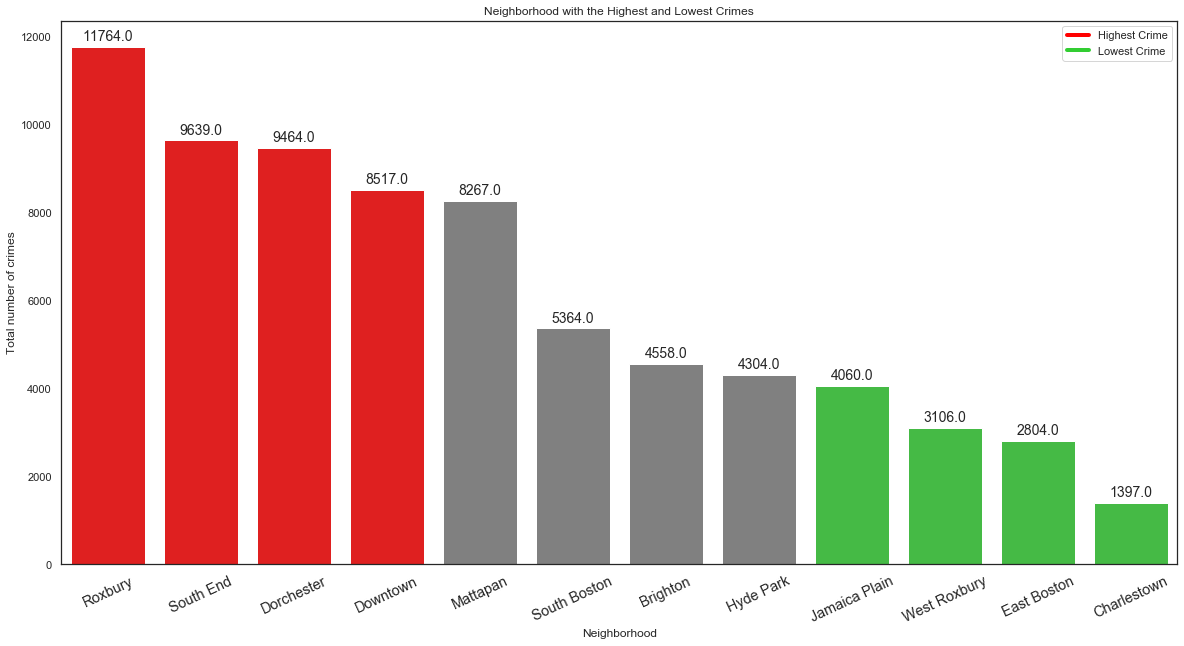

In [60]:
import seaborn as sns
from matplotlib.lines import Line2D

sns.set(style="white")

# create the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))
colors = ["red","red","red","red","grey","grey","grey","grey","limegreen","limegreen","limegreen","limegreen","limegreen"]
custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="limegreen", lw=4)]

# plot the graph of Total number of crimes in each neighborhood
barplot_alltypes = sns.barplot(x=df_v.index, y="Total", data=df_v, palette=colors)

# set the axis labels
ax.set_title('Neighborhood with the Highest and Lowest Crimes') # add title to the plot
ax.set(ylabel="Total number of crimes", xlabel="Neighborhood")
ax.legend(custom_lines, ['Highest Crime', 'Lowest Crime'])

# rotate xticklabels
barplot_alltypes.set_xticklabels(barplot_alltypes.get_xticklabels(),
                        rotation=25,
                        fontweight='light',
                        fontsize='large'
                        )

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>The Bar chart clearly shows the top 4 neighborhoods with the highest and lowest number of crimes. Based on the data, in 2019, the highest number of reported crimes happened in<strong>&nbsp;Roxbury</strong> and the lowest in <strong>Charlestown</strong>. Hence, Charlestown is the safest neighborhood to live in.</span></p>

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Plotting the<strong>&nbsp;Top 10 Offense Categories</strong> in the neighborhood of Charlestown.</span></p>

In [47]:
# Slicing df_pivot to select only Charlestown and using transpose() to switch rows and columns  
top_O = pd.DataFrame(df_pivot.loc[['Charlestown'],:].transpose())

In [48]:
# dropping the total row
top_O.drop(axis=0, index=['Total'], inplace=True)

In [49]:
# Sort values in decending order to list offense category from highest to lowest
topO_sort = top_O.sort_values('Charlestown',ascending=False).head(10)

In [50]:
topO_sort

District_Names,Charlestown
Offense_Category,
Motor Vehicle Accident Response,232.0
Medical Assistance,136.0
Larceny,99.0
Investigate Person,90.0
Other,86.0
Towed,76.0
Simple Assault,66.0
Vandalism,64.0
Drug Violation,59.0


In [51]:
# Switch the rows and columns for plotting
topO_plot = topO_sort.transpose()
topO_plot

Offense_Category,Motor Vehicle Accident Response,Medical Assistance,Larceny,Investigate Person,Other,Towed,Simple Assault,Vandalism,Drug Violation,Larceny From Motor Vehicle
District_Names,,,,,,,,,,
Charlestown,232.0,136.0,99.0,90.0,86.0,76.0,66.0,64.0,59.0,55.0


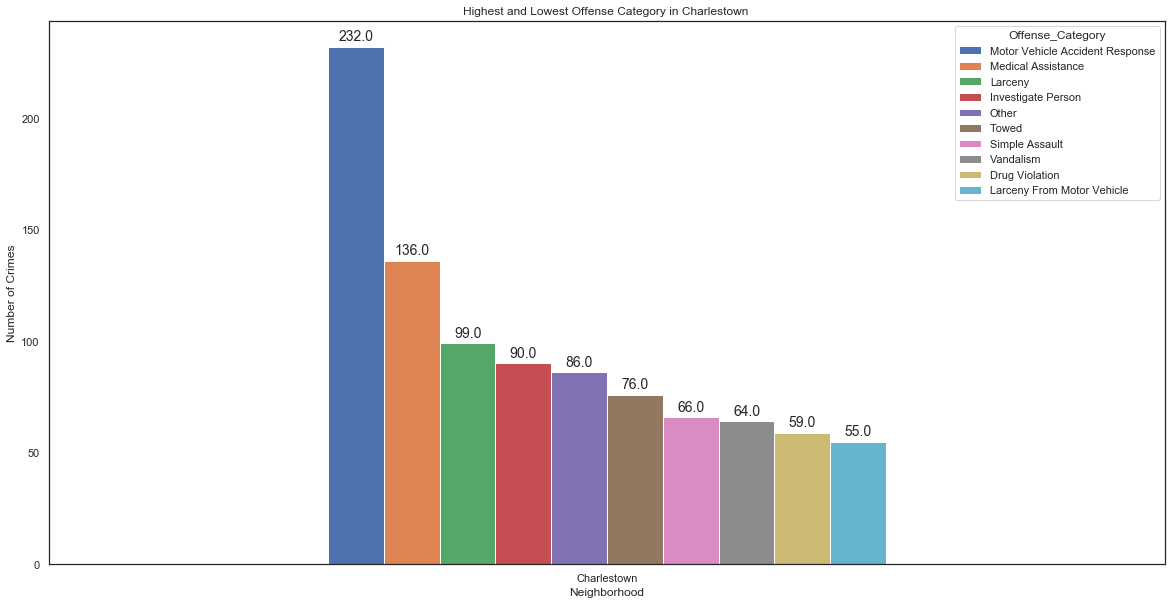

In [59]:
# Plot the data
ax = topO_plot.plot(kind='bar', figsize=(20, 10), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighborhood') # add y-label to the plot
ax.set_title('Highest and Lowest Offense Category in Charlestown ') # add title to the plot

# Annotate the bars 
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Looking at the plot, it&#39;s clear that in Charlestown the highest reported offense category is <strong>Motor Vehicle Accident Response</strong> standing at <strong>232</strong> total reported cases and the lowest <strong>larceny from Motor Vehicle </strong>standing at<strong>&nbsp;55</strong>. &nbsp;</span></p>

<p>
    <font face="Times New Roman, Times, serif"><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Now that the safest neighborhood is identified, Let&#39;s slice the original dataframe created in the cleaning process to select the <strong>street name, latitude and longitude of each street</strong> in Charlestown to map the neighborhood using Folium.</span></font>
</p>

In [61]:
# Assign the sliced data to Charlestown_data
Charlestown_data = df[df['District_Names'] == 'Charlestown'].reset_index(drop=True)
Charlestown_data.head()

,District_Names,Street,Offense_Category,Lat,Long
0,Charlestown,N MEAD ST,Auto Theft,42.381846,-71.066551
1,Charlestown,AUBURN ST,Motor Vehicle Accident Response,42.381208,-71.069143
2,Charlestown,LOWNEY WAY,Vandalism,42.374395,-71.058038
3,Charlestown,LOWNEY WAY,Larceny,42.374395,-71.058038
4,Charlestown,MONUMENT ST,Motor Vehicle Accident Response,42.378971,-71.059343


In [62]:
# Drop Offense_Category
Charlestown_data.drop(axis=1, columns=['Offense_Category'], inplace=True)

# reset index
Charlestown_data.reset_index(drop=True, inplace=True)

# Check the data
Charlestown_data.head(5)

,District_Names,Street,Lat,Long
0,Charlestown,N MEAD ST,42.381846,-71.066551
1,Charlestown,AUBURN ST,42.381208,-71.069143
2,Charlestown,LOWNEY WAY,42.374395,-71.058038
3,Charlestown,LOWNEY WAY,42.374395,-71.058038
4,Charlestown,MONUMENT ST,42.378971,-71.059343


In [63]:
Charlestown_data.shape

(1397, 4)

In [64]:
# check for missing values
missing_data = Charlestown_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

District_Names
False    1397
Name: District_Names, dtype: int64

Street
False    1376
True       21
Name: Street, dtype: int64

Lat
False    1315
True       82
Name: Lat, dtype: int64

Long
False    1315
True       82
Name: Long, dtype: int64



In [65]:
# Drop missing values
Charlestown_data.dropna(subset=["Street","Lat","Long" ], axis=0, inplace=True)

# reset index
Charlestown_data.reset_index(drop=True, inplace=True)

# Check data
Charlestown_data.head(5)

,District_Names,Street,Lat,Long
0,Charlestown,N MEAD ST,42.381846,-71.066551
1,Charlestown,AUBURN ST,42.381208,-71.069143
2,Charlestown,LOWNEY WAY,42.374395,-71.058038
3,Charlestown,LOWNEY WAY,42.374395,-71.058038
4,Charlestown,MONUMENT ST,42.378971,-71.059343


In [66]:
missing_data = Charlestown_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

District_Names
False    1315
Name: District_Names, dtype: int64

Street
False    1315
Name: Street, dtype: int64

Lat
False    1315
Name: Lat, dtype: int64

Long
False    1315
Name: Long, dtype: int64



In [402]:
Charlestown_data.shape

(1315, 4)

In [70]:
# Drop the duplicates in the street columns
Charlestown_data.drop_duplicates(subset="Street", inplace=True)

# Check the number of rows and columns
#Charlestown_data.shape

In [73]:
# Check the number of rows and columns
Charlestown_data.shape

(138, 4)

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Now that the data is cleaned, geo_coder is used to find the latitude and longitude of Charlestown, MA. This is then combined to the latitude and longitude per street and mapped using Folium.</span></p>

In [71]:
# using geo_coder to find the lat and long of Charlestown, Boston, MA
address = 'Charlestown, MA'

geolocator = Nominatim(user_agent="ma_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Charlestown are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Charlestown are 42.3778749, -71.0619957.


In [74]:
# create map Charlestown using the latitude and longitude found above 
map_charlestown = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Charlestown_data['Lat'], Charlestown_data['Long'], Charlestown_data['Street']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(map_charlestown)  
    
map_charlestown

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Charlestown is mapped!! the next step is to connect to the Foursquare API to identify the various venues in 138 unique streets in the neighborhood. </span></p>

In [78]:
# Defining credentials 
CLIENT_ID = 'CPJSDRMG4GTJNZO14DBHP1HS5V3MNOZXA1IGZXU3QBWYVJSV' # Foursquare ID
CLIENT_SECRET = 'S44ISRRY0GPTPW0HVFL0CX42PMWUYBJQ1F05UEURYI0UTHRU' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CPJSDRMG4GTJNZO14DBHP1HS5V3MNOZXA1IGZXU3QBWYVJSV
CLIENT_SECRET:S44ISRRY0GPTPW0HVFL0CX42PMWUYBJQ1F05UEURYI0UTHRU


In [79]:
# Creating a function to get the near by venues and coverting into a data frame
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [80]:
# Excecuting the function
Charlestown_venues = getNearbyVenues(names=Charlestown_data['Street'],
                                   latitudes=Charlestown_data['Lat'],
                                   longitudes=Charlestown_data['Long']
                                  )


N MEAD ST
AUBURN ST
LOWNEY WAY
MONUMENT ST
EDEN ST
THOMPSON SQ
BUNKER HILL ST
DECATUR ST
RUTHERFORD AVE
VINE ST
SALEM ST
WALFORD WAY
OAK ST
CHARLES RIVER AVE
SACKVILLE ST
EIGHTH ST
AUSTIN ST
O'REILLY WAY
WALL ST
O'MEARA CT
MAIN ST
SEVENTH ST
W SCHOOL ST
CAMBRIDGE ST
MYSTIC ST
SHIPWAY PL
SULLIVAN ST
CARNEY CT
POLK ST
TRENTON ST
ELM ST
BUNKER HILL INDUSTRIAL PA
WALKER ST
MEDFORD ST
BARTLETT ST
MONUMENT SQ
PROSPECT ST
TREMONT ST
MOUNT VERNON ST
MONUMENT AVE
SIXTEENTH ST
PRESCOTT ST
OLD IRONSIDES WAY
ROLAND ST
HARVARD ST
TIBBETT'S TOWN WAY
VENDEN PL
CONSTITUTION RD
SOLEY ST
THIRTEENTH ST
CRESCENT ST
TERMINAL ST
HIGH ST
WOOD ST
RUSSELL ST
COREY ST
PEARL ST
SAMUEL MORSE WAY
CITY SQ
LYNDEBORO ST
PHIPPS ST
ESSEX ST
SHORT ST
SIXTH ST
NINTH ST
SPICE ST
THIRD AVE
STARR KING CT
ALFORD ST
MCNULTY CT
BALDWIN ST
MAFFA WAY
DUNSTABLE ST
FERRIN ST
FIFTH AVE
FIRST AVE
DEVENS ST
SEVER ST
BEACHAM ST
MOULTON ST
SECOND AVE
FOURTH AVE
CHELSEA ST
FIFTH ST
CALDWELL ST
ARLINGTON AVE
TUFTS ST
CROSS ST
BRIGHTON ST

<p><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>The function, getNearbyVenues, extracts the data from Foursquare API and coverts it into a dataframe which can be seen below.</span></p>

In [81]:
# checking the data_frame
print(Charlestown_venues.shape)
Charlestown_venues.head()

(2948, 7)


,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,N MEAD ST,42.381846,-71.066551,Jenny's Pizza & Subs,42.381289,-71.063019,Pizza Place
1,N MEAD ST,42.381846,-71.066551,BCYF- Clougherty Pool,42.382149,-71.067295,Pool
2,N MEAD ST,42.381846,-71.066551,Charlestown Working Theater,42.383344,-71.071152,Theater
3,N MEAD ST,42.381846,-71.066551,Grasshopper Cafe,42.379377,-71.063330,Café
4,N MEAD ST,42.381846,-71.066551,Domino's Pizza,42.377501,-71.066705,Pizza Place


In [82]:
# Number of Venue categories per street 
Charlestown_venues.groupby('Street').count()

,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Street,,,,,,
ADAMS ST,30,30,30,30,30,30
ALBION PL,10,10,10,10,10,10
ALFORD ST,2,2,2,2,2,2
ALLSTON ST,13,13,13,13,13,13
ARLINGTON AVE,19,19,19,19,19,19
AUBURN ST,9,9,9,9,9,9
AUSTIN ST,22,22,22,22,22,22
BALDWIN ST,13,13,13,13,13,13
BARTLETT ST,21,21,21,21,21,21


In [83]:
# Number of unique Venue categories 
print('There are {} uniques categories.'.format(len(Charlestown_venues['Venue Category'].unique())))

There are 95 uniques categories.


<p><span style="font-size: 18px;"><strong><span style="font-family: 'Times New Roman', Times, serif;">K-Means Clustering</span></strong></span></p>

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>Now that the data frame is created, the next step is to <strong>one hot encode</strong> the values in the dataframe to get it ready for <strong>k-means</strong>. Once the one hot encode is done, the Street column is added back to the dataframe.</span></p>

In [84]:
# one hot encoding
Charlestown_onehot = pd.get_dummies(Charlestown_venues[['Venue Category']], prefix="", prefix_sep="")

# add street column back to dataframe
Charlestown_onehot['Street'] = Charlestown_venues['Street'] 

# move Street column to the first column
fixed_columns = [Charlestown_onehot.columns[-1]] + list(Charlestown_onehot.columns[:-1])
Charlestown_onehot = Charlestown_onehot[fixed_columns]

Charlestown_onehot.head()

,Street,Alternative Healer,American Restaurant,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Track Stadium,Tunnel,Vegetarian / Vegan Restaurant,Wine Bar,Yoga Studio
0,N MEAD ST,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,N MEAD ST,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,N MEAD ST,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,N MEAD ST,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N MEAD ST,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Checking the no. of rows and columns
Charlestown_onehot.shape

(2948, 96)

In [87]:
# Grouping the data by Street column and calculating the mean
Charlestown_grouped = Charlestown_onehot.groupby('Street').mean().reset_index()
Charlestown_grouped.head(5)

,Street,Alternative Healer,American Restaurant,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Track Stadium,Tunnel,Vegetarian / Vegan Restaurant,Wine Bar,Yoga Studio
0,ADAMS ST,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.033333,0.000000,...,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333
1,ALBION PL,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.0,0.0,0.000000
2,ALFORD ST,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,ALLSTON ST,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.000000,0.000000,...,0.0,0.076923,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,ARLINGTON AVE,0.0,0.052632,0.0,0.0,0.000000,0.0,0.0,0.000000,0.052632,...,0.0,0.000000,0.000000,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000


In [88]:
Charlestown_grouped.shape

(138, 96)

In [89]:
# Listing the top 5 venues per street based on their mean
num_top_venues = 5

for st in Charlestown_grouped['Street']:
    print("----"+st+"----")
    temp = Charlestown_grouped[Charlestown_grouped['Street'] == st].T.reset_index()
    temp.columns = ['venue','freq'] # naming the columns in the list
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float) # changing the type of frequency
    temp = temp.round({'freq': 2}) # rounding the decimels to "2"
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)) # sorting values in decending order. 
    print('\n')

----ADAMS ST----
            venue  freq
0   National Park  0.07
1            Park  0.07
2       Gastropub  0.07
3             Pub  0.07
4  History Museum  0.07


----ALBION PL----
                  venue  freq
0  Gym / Fitness Center   0.2
1           Bus Station   0.1
2                  Café   0.1
3                  Pool   0.1
4               Theater   0.1


----ALFORD ST----
                 venue  freq
0           Restaurant   0.5
1                 Taxi   0.5
2   Alternative Healer   0.0
3             Pharmacy   0.0
4  Rental Car Location   0.0


----ALLSTON ST----
                venue  freq
0   Convenience Store  0.15
1         Pizza Place  0.15
2                Pool  0.08
3           Gastropub  0.08
4  Athletics & Sports  0.08


----ARLINGTON AVE----
                  venue  freq
0                   Gym  0.11
1  Gym / Fitness Center  0.11
2           Bus Station  0.11
3    Mexican Restaurant  0.05
4                  Park  0.05


----AUBURN ST----
                  venue  freq
0 

In [90]:
# Function to return most common venues 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [91]:
# 10 most common venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Street']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind])) # the top 3 venues in a Street
    except:
        columns.append('{}th Most Common Venue'.format(ind+1)) # the remaining 

# create a new dataframe
Charlestown_venues_sorted = pd.DataFrame(columns=columns)
Charlestown_venues_sorted['Street'] = Charlestown_grouped['Street']

for ind in np.arange(Charlestown_grouped.shape[0]):
    Charlestown_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Charlestown_grouped.iloc[ind, :], num_top_venues)

Charlestown_venues_sorted.head()

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADAMS ST,Pub,History Museum,Park,National Park,Gastropub,Yoga Studio,Café,Pharmacy,Plaza,Pet Store
1,ALBION PL,Gym / Fitness Center,Bus Station,Pool,Cycle Studio,Theater,Pizza Place,Gym,Café,Park,Yoga Studio
2,ALFORD ST,Taxi,Restaurant,Yoga Studio,Grocery Store,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store
3,ALLSTON ST,Pizza Place,Convenience Store,Deli / Bodega,Gym,Pool,Coffee Shop,Café,Gastropub,Music Venue,Tennis Court
4,ARLINGTON AVE,Bus Station,Gym,Gym / Fitness Center,Coffee Shop,Café,Bus Stop,Cycle Studio,Park,Mexican Restaurant,Metro Station


In [92]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Charlestown_grouped_clustering = Charlestown_grouped.drop('Street', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Charlestown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 4, 0, 3, 3, 1, 3, 1, 3])

In [93]:
# add clustering labels
Charlestown_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Charlestown_merged = Charlestown_data

# merge Charlestown_grouped with Charlestown_data to add latitude/longitude for each street
Charlestown_merged = Charlestown_merged.join(Charlestown_venues_sorted.set_index('Street'), on='Street')

Charlestown_merged.head() # check columns!

,District_Names,Street,Lat,Long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlestown,N MEAD ST,42.381846,-71.066551,0,Pizza Place,Bus Station,Pool,Convenience Store,Theater,Gym / Fitness Center,Gym,Music Venue,Café,Yoga Studio
1,Charlestown,AUBURN ST,42.381208,-71.069143,3,Gym / Fitness Center,Bus Station,Pool,Theater,Pizza Place,Gym,Café,Park,Yoga Studio,Dive Bar
2,Charlestown,LOWNEY WAY,42.374395,-71.058038,1,History Museum,Gastropub,Pub,Donut Shop,Park,National Park,Grocery Store,Convenience Store,Coffee Shop,Seafood Restaurant
4,Charlestown,MONUMENT ST,42.378971,-71.059343,2,Boat or Ferry,Surf Spot,Pizza Place,Donut Shop,National Park,Music Venue,Candy Store,Café,Monument / Landmark,Gastropub
5,Charlestown,EDEN ST,42.379722,-71.067560,1,Pizza Place,Yoga Studio,Gym,Pharmacy,Pet Store,Coffee Shop,Donut Shop,Café,Shopping Mall,Gastropub


In [94]:
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ['c','k','g','m']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Charlestown_merged['Lat'], Charlestown_merged['Long'], Charlestown_merged['Street'], Charlestown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [110]:
Charlestown_merged.shape

(138, 15)

<p><span style='font-size: 16px; font-family: "Times New Roman", Times, serif;'>The first cluster consists of <strong>18 out of the 138 streets</strong>. Individuals who are current residents or potential residents will have access to a bunch of love pizza places, deli shops and coffee but mainly <strong>pizza places</strong> as it appears <strong>14 times</strong> in the 1<sup>st</sup> and 2<sup>nd</sup> most common venues. There are other venues available like music venues, tennis courts and gyms but they are not as common</span></p>

In [95]:
Charlestown_merged.loc[Charlestown_merged['Cluster Labels'] == 0, Charlestown_merged.columns[[1] + list(range(5, Charlestown_merged.shape[1]))]]

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,N MEAD ST,Pizza Place,Bus Station,Pool,Convenience Store,Theater,Gym / Fitness Center,Gym,Music Venue,Café,Yoga Studio
15,SACKVILLE ST,Convenience Store,Pizza Place,Deli / Bodega,Tennis Court,Pool,Café,Gastropub,Gym,Music Venue,Athletics & Sports
26,MYSTIC ST,Convenience Store,Pizza Place,Deli / Bodega,National Park,Café,Music Venue,Gastropub,Monument / Landmark,Pool,Gym
30,CARNEY CT,Convenience Store,Pizza Place,Boat or Ferry,National Park,Music Venue,Candy Store,Café,Gastropub,Monument / Landmark,Donut Shop
40,MEDFORD ST,Convenience Store,Deli / Bodega,Martial Arts Dojo,Donut Shop,Pizza Place,Candy Store,Café,National Park,Music Venue,Gym
64,OLD IRONSIDES WAY,Convenience Store,Deli / Bodega,Boat or Ferry,Donut Shop,Pizza Place,Park,National Park,Café,Music Venue,Gastropub
82,TERMINAL ST,Tennis Court,Harbor / Marina,Music Venue,Brewery,Athletics & Sports,Martial Arts Dojo,Food,Boat or Ferry,Convenience Store,Gastropub
108,PEARL ST,Pizza Place,Convenience Store,Yoga Studio,Café,History Museum,Historic Site,Gym,Monument / Landmark,Gastropub,Music Venue
122,LYNDEBORO ST,Gym,Pool,Theater,Pizza Place,Food,Bus Station,Gastropub,Grocery Store,Dive Bar,Dog Run
303,BELMONT ST,Convenience Store,Pizza Place,Deli / Bodega,Tennis Court,Pool,Café,Gastropub,Gym,Music Venue,Athletics & Sports


In [96]:
# Checking the most common venues per column 
cluster_0 = Charlestown_merged[Charlestown_merged['Cluster Labels'] == 0]

print(cluster_0['1st Most Common Venue'].value_counts(),'\n')
print(cluster_0['2nd Most Common Venue'].value_counts(),'\n')
print(cluster_0['3rd Most Common Venue'].value_counts(),'\n')
print(cluster_0['4th Most Common Venue'].value_counts(),'\n')
print(cluster_0['5th Most Common Venue'].value_counts(),'\n')
print(cluster_0['6th Most Common Venue'].value_counts(),'\n')
print(cluster_0['7th Most Common Venue'].value_counts(),'\n')
print(cluster_0['8th Most Common Venue'].value_counts(),'\n')
print(cluster_0['9th Most Common Venue'].value_counts(),'\n')
print(cluster_0['10th Most Common Venue'].value_counts())


Pizza Place          8
Convenience Store    8
Gym                  1
Tennis Court         1
Name: 1st Most Common Venue, dtype: int64 

Pizza Place          6
Convenience Store    4
Pool                 2
Deli / Bodega        2
Bus Station          2
Harbor / Marina      1
Gym                  1
Name: 2nd Most Common Venue, dtype: int64 

Deli / Bodega          6
Pool                   2
Boat or Ferry          2
Yoga Studio            2
Gym                    1
Bus Station            1
Martial Arts Dojo      1
American Restaurant    1
Theater                1
Music Venue            1
Name: 3rd Most Common Venue, dtype: int64 

Tennis Court         4
Convenience Store    2
Donut Shop           2
Café                 2
National Park        2
Pizza Place          1
Pool                 1
Gym                  1
Gastropub            1
Brewery              1
Theater              1
Name: 4th Most Common Venue, dtype: int64 

Pool                  6
Theater               3
Pizza Place         

In [105]:
cluster_0.shape

(18, 15)

<p style="margin: 0in 0in 8pt; font-size: 16px; font-family: Calibri, sans-serif;"><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>The second cluster is the largest and consists of<strong>&nbsp;60 streets out of the total 138</strong>. Individuals moving into these streets or who are currently residents have access to a lot of <strong>pubs</strong> as it appears <strong>37 times</strong> in the 1<sup>st</sup>, 2<sup>nd,</sup> and 3<sup>rd</sup> most common venue columns. The streets also have other venues such pizza places, convenience stores, caf&eacute;&rsquo;s, and pharmacies. The other venues that are not very common are pet stores, gyms and grocery stores to name a few.</span></p>

In [97]:
Charlestown_merged.loc[Charlestown_merged['Cluster Labels'] == 1, Charlestown_merged.columns[[1] + list(range(5, Charlestown_merged.shape[1]))]]

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,LOWNEY WAY,History Museum,Gastropub,Pub,Donut Shop,Park,National Park,Grocery Store,Convenience Store,Coffee Shop,Seafood Restaurant
5,EDEN ST,Pizza Place,Yoga Studio,Gym,Pharmacy,Pet Store,Coffee Shop,Donut Shop,Café,Shopping Mall,Gastropub
6,THOMPSON SQ,Pizza Place,Café,Pub,Coffee Shop,Gastropub,Pet Store,Plaza,Park,History Museum,National Park
11,SALEM ST,Pub,Convenience Store,Coffee Shop,Yoga Studio,Gastropub,Donut Shop,Pharmacy,Deli / Bodega,Pet Store,National Park
14,CHARLES RIVER AVE,Pub,Pizza Place,Donut Shop,Park,Brewery,Moroccan Restaurant,Playground,Plaza,Restaurant,Lounge
18,AUSTIN ST,Coffee Shop,Pizza Place,Pub,Yoga Studio,Shopping Mall,American Restaurant,Bank,Convenience Store,Donut Shop,Gastropub
20,WALL ST,Pizza Place,Convenience Store,Gastropub,Pool,Pharmacy,Deli / Bodega,Pet Store,Donut Shop,Coffee Shop,Café
22,MAIN ST,Pub,Convenience Store,Coffee Shop,Yoga Studio,Café,History Museum,Historic Site,Liquor Store,Grocery Store,Gastropub
24,W SCHOOL ST,Pub,Pizza Place,Coffee Shop,Yoga Studio,Grocery Store,Pharmacy,Pet Store,Convenience Store,Donut Shop,Shopping Mall
29,SULLIVAN ST,Convenience Store,Pizza Place,Coffee Shop,Yoga Studio,Grocery Store,Donut Shop,Pharmacy,Deli / Bodega,Pet Store,National Park


In [98]:
# Checking the most common venues per column 
cluster_1 = Charlestown_merged[Charlestown_merged['Cluster Labels'] == 1]

print(cluster_1['1st Most Common Venue'].value_counts(),'\n')
print(cluster_1['2nd Most Common Venue'].value_counts(),'\n')
print(cluster_1['3rd Most Common Venue'].value_counts(),'\n')
print(cluster_1['4th Most Common Venue'].value_counts(),'\n')
print(cluster_1['5th Most Common Venue'].value_counts(),'\n')
print(cluster_1['6th Most Common Venue'].value_counts(),'\n')
print(cluster_1['7th Most Common Venue'].value_counts(),'\n')
print(cluster_1['8th Most Common Venue'].value_counts(),'\n')
print(cluster_1['9th Most Common Venue'].value_counts(),'\n')
print(cluster_1['10th Most Common Venue'].value_counts())

Pizza Place           15
Pub                   15
Coffee Shop            6
Convenience Store      5
Park                   4
History Museum         4
Gastropub              3
Donut Shop             3
Yoga Studio            3
Chinese Restaurant     1
National Park          1
Name: 1st Most Common Venue, dtype: int64 

Pub                    12
Convenience Store      10
Pizza Place             8
Gastropub               5
Coffee Shop             4
Park                    4
History Museum          4
Yoga Studio             4
Donut Shop              3
Café                    2
Bar                     1
American Restaurant     1
Asian Restaurant        1
Grocery Store           1
Name: 2nd Most Common Venue, dtype: int64 

Coffee Shop          14
Pub                  10
Gastropub             7
National Park         6
Convenience Store     5
Park                  4
History Museum        4
Pizza Place           3
Donut Shop            3
Gym                   1
Bakery                1
Pool     

In [107]:
cluster_1.shape

(60, 15)

<p style="margin: 0in 0in 8pt; font-size: 15px; font-family: Calibri, sans-serif;"><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>The third cluster is the <strong>second largest</strong> one and consists of <strong>34 streets</strong>. These streets are for individuals who enjoy going to <strong>history museums, national parks, going on boats &amp; ferries</strong> and having donuts occasionally or every day. The other venues that are not very common are pizza places, gyms and grocery stores to name a few.</span></p>

In [99]:
Charlestown_merged.loc[Charlestown_merged['Cluster Labels'] == 2, Charlestown_merged.columns[[1] + list(range(5, Charlestown_merged.shape[1]))]]

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,MONUMENT ST,Boat or Ferry,Surf Spot,Pizza Place,Donut Shop,National Park,Music Venue,Candy Store,Café,Monument / Landmark,Gastropub
7,BUNKER HILL ST,Boat or Ferry,Donut Shop,History Museum,National Park,Monument / Landmark,Playground,Convenience Store,Park,Candy Store,Café
8,DECATUR ST,Park,Surf Spot,Grocery Store,Donut Shop,Tourist Information Center,Martial Arts Dojo,Convenience Store,Gym Pool,Gastropub,Boat or Ferry
10,VINE ST,National Park,Café,History Museum,Boat or Ferry,Donut Shop,Park,Gastropub,Surf Spot,Grocery Store,Monument / Landmark
12,WALFORD WAY,Donut Shop,Café,Boat or Ferry,Gym,Convenience Store,National Park,Candy Store,Gastropub,Monument / Landmark,Grocery Store
16,EIGHTH ST,Café,History Museum,Harbor / Marina,Grocery Store,Park,Seafood Restaurant,Surf Spot,Boat or Ferry,Beer Garden,Convenience Store
19,O'REILLY WAY,Donut Shop,Café,Boat or Ferry,Surf Spot,Convenience Store,National Park,Candy Store,Gastropub,Monument / Landmark,Grocery Store
21,O'MEARA CT,Playground,National Park,Candy Store,Café,Monument / Landmark,Gastropub,Plaza,Boat or Ferry,Surf Spot,Gym
23,SEVENTH ST,Boat or Ferry,Playground,History Museum,Donut Shop,Café,Gastropub,Convenience Store,Seafood Restaurant,Park,National Park
27,SHIPWAY PL,Harbor / Marina,Park,Café,Surf Spot,Convenience Store,History Museum,Playground,Gym Pool,Seafood Restaurant,Donut Shop


In [100]:
# Checking the most common venues per column 
cluster_2 = Charlestown_merged[Charlestown_merged['Cluster Labels'] == 2]

print(cluster_2['1st Most Common Venue'].value_counts(),'\n')
print(cluster_2['2nd Most Common Venue'].value_counts(),'\n')
print(cluster_2['3rd Most Common Venue'].value_counts(),'\n')
print(cluster_2['4th Most Common Venue'].value_counts(),'\n')
print(cluster_2['5th Most Common Venue'].value_counts(),'\n')
print(cluster_2['6th Most Common Venue'].value_counts(),'\n')
print(cluster_2['7th Most Common Venue'].value_counts(),'\n')
print(cluster_2['8th Most Common Venue'].value_counts(),'\n')
print(cluster_2['9th Most Common Venue'].value_counts(),'\n')
print(cluster_2['10th Most Common Venue'].value_counts())

Donut Shop         9
Café               6
History Museum     5
Boat or Ferry      4
Playground         4
Park               3
Harbor / Marina    2
National Park      1
Name: 1st Most Common Venue, dtype: int64 

History Museum    8
Donut Shop        8
Café              5
Surf Spot         5
Boat or Ferry     2
Playground        2
Park              2
Gym               1
National Park     1
Name: 2nd Most Common Venue, dtype: int64 

Boat or Ferry                 5
History Museum                5
Donut Shop                    5
National Park                 3
Harbor / Marina               2
Café                          2
Park                          2
Grocery Store                 2
Surf Spot                     2
Gym Pool                      1
Pub                           1
Tourist Information Center    1
Pizza Place                   1
Candy Store                   1
Brewery                       1
Name: 3rd Most Common Venue, dtype: int64 

Harbor / Marina       5
Donut Shop      

In [108]:
cluster_2.shape

(34, 15)

<p style="margin: 0in 0in 8pt; font-size: 15px; font-family: Calibri, sans-serif;"><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>The fourth cluster consists of <strong>25 out of 138 streets</strong> and these streets are for individuals who are into <strong>fitness</strong> as well as for individuals who rely on <strong>public transportation</strong> for their daily commute or for new residents who are planning to use public transportation as their main source of transportation. Other common venues are donut shops, cafe&#39;s, parks, and liquor stores to name a few.</span></p>

In [101]:
Charlestown_merged.loc[Charlestown_merged['Cluster Labels'] == 3, Charlestown_merged.columns[[1] + list(range(5, Charlestown_merged.shape[1]))]]

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,AUBURN ST,Gym / Fitness Center,Bus Station,Pool,Theater,Pizza Place,Gym,Café,Park,Yoga Studio,Dive Bar
9,RUTHERFORD AVE,Bus Station,Gym / Fitness Center,Recording Studio,Food,Bus Stop,Pool,Park,Gym,Café,Bank
13,OAK ST,Gastropub,Bus Station,Pool,Theater,Pizza Place,Gym / Fitness Center,Gym,Café,Park,Dive Bar
25,CAMBRIDGE ST,Bus Station,Gym,Gym / Fitness Center,Donut Shop,Liquor Store,Metro Station,Coffee Shop,Café,Bus Stop,Park
35,BUNKER HILL INDUSTRIAL PA,Bus Station,Pool,Theater,Pizza Place,Metro Station,Food,Gym,Park,Gastropub,Yoga Studio
66,ROLAND ST,Donut Shop,Bus Station,Cycle Studio,Bus Stop,Pub,Gym,Gym / Fitness Center,Coffee Shop,Dance Studio,Metro Station
80,CRESCENT ST,Donut Shop,Bus Station,Gym,Rental Car Location,Dog Run,Pizza Place,Dance Studio,Coffee Shop,Snack Place,Bus Stop
132,SHORT ST,Café,Gym / Fitness Center,Bank,Bus Station,Recording Studio,Gym,Park,Theater,Cycle Studio,Pool
137,SPICE ST,Bus Station,Gym,Gym / Fitness Center,Donut Shop,Baseball Field,Coffee Shop,Café,Bus Stop,Park,Metro Station
150,BALDWIN ST,Gym / Fitness Center,Recording Studio,Bank,Park,Bus Station,Pool,Gym,Baseball Field,Café,Cycle Studio


In [102]:
# Checking the most common venues per column 
cluster_3 = Charlestown_merged[Charlestown_merged['Cluster Labels'] == 3]

print(cluster_3['1st Most Common Venue'].value_counts(),'\n')
print(cluster_3['2nd Most Common Venue'].value_counts(),'\n')
print(cluster_3['3rd Most Common Venue'].value_counts(),'\n')
print(cluster_3['4th Most Common Venue'].value_counts(),'\n')
print(cluster_3['5th Most Common Venue'].value_counts(),'\n')
print(cluster_3['6th Most Common Venue'].value_counts(),'\n')
print(cluster_3['7th Most Common Venue'].value_counts(),'\n')
print(cluster_3['8th Most Common Venue'].value_counts(),'\n')
print(cluster_3['9th Most Common Venue'].value_counts(),'\n')
print(cluster_3['10th Most Common Venue'].value_counts())


Donut Shop              9
Bus Station             8
Gym / Fitness Center    4
Café                    3
Gastropub               1
Name: 1st Most Common Venue, dtype: int64 

Gym                     7
Bus Station             6
Gym / Fitness Center    5
Recording Studio        2
Rental Car Location     2
Park                    2
Pool                    1
Name: 2nd Most Common Venue, dtype: int64 

Gym / Fitness Center    5
Bank                    4
Pool                    3
Liquor Store            2
Mexican Restaurant      2
Cycle Studio            1
Pub                     1
Gym                     1
Recording Studio        1
Coffee Shop             1
Dog Run                 1
Theater                 1
Café                    1
Bus Station             1
Name: 3rd Most Common Venue, dtype: int64 

Bus Station             5
Donut Shop              4
Gym / Fitness Center    4
Rental Car Location     2
Theater                 2
Cycle Studio            1
Italian Restaurant      1
Coffee Sho

In [109]:
cluster_3.shape

(25, 15)

<p><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>The fifth cluster consists of just <strong>1 street out 138</strong> making this an outlier.</span></p>

In [104]:
Charlestown_merged.loc[Charlestown_merged['Cluster Labels'] == 4, Charlestown_merged.columns[[1] + list(range(5, Charlestown_merged.shape[1]))]]

,Street,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
146,ALFORD ST,Taxi,Restaurant,Yoga Studio,Grocery Store,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store


<p><span style="font-size: 19px;"><strong><span style="font-family: 'Times New Roman', Times, serif;">Results and Discussions</span></strong></span></p>
<p><span style='font-family: "Times New Roman", Times, serif; font-size: 16px;'>The goal of this analysis/project was to help me to look into the different neighborhoods of Boston, MA to decide which one to move to but this is an analysis/project that can assist any individual who are planning to move into the city of Boston. The analysis showed that Charlestown is the safest neighborhood having 1397 reported crimes compared to an astounding 11764 reported crimes in Roxbury in the year 2019.</span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 16px;">K-means clustering grouped all streets in the neighborhood of Charlestown into 5 clusters with similar venues. Based on the analysis, I would personally look into the streets in cluster 4 because I am a person who enjoys fitness as well uses public transport as a daily source of transportation. For individuals who like to eat out a lot and have fun with access to convenient stores and pharmacies, clusters 1 and 2 are for you. Individuals who enjoy hikes, history, boats, ferries and bit of surfing, cluster 3 is for you.</span> </span></p>

<p><span style='font-family: "Times New Roman", Times, serif; font-size: 19px;'><strong>Conclusion</strong></span></p>
<p><span style="font-family: 'Times New Roman', Times, serif;"><span style="font-size: 16px;">Moving into a new city or country has so many factors to it. This analysis is an indicator of how technology can be utilized to gain additional insights on the city or country one is planning on moving to. Couple lines of code narrowed down the safest neighborhood &nbsp;as well the venues around that neighborhood making the whole process of moving easier for an individual. They could use their time to look into the other factors that were not taken into consideration like the cost of living and housing, which deserves their own analysis. But as a start, anyone who is planning to move to the city of Boston, Charlestown is the place to be.</span> </span></p>